# s01: Plotting


This is a quick introduction to Matplotlib.


From [Claus O. Wilke: "Fundamentals of Data Visualization"](https://clauswilke.com/dataviz/):

> *One thing I have learned over the years is that automation is your friend. I
> think figures should be autogenerated as part of the data analysis pipeline
> (which should also be automated), and they should come out of the pipeline
> ready to be sent to the printer, no manual post-processing needed.*

## Objectives of this session:
- Be able to create simple plots with Matplotlib and tweak them
- Know about object-oriented vs pyplot interfaces of Matplotlib
- Be able to adapt gallery examples
- Know how to look for help
- Know that other tools exist

## Repeatability/reproducibility
- **No manual post-processing**. This will bite you when you need to regenerate 50 figures one day before a deadline or regenerate a set of figures after changes in your analysis.
- Within Python, many libraries exist:
  - [Matplotlib](https://matplotlib.org/gallery/index.html):
    probably the most standard and most widely used
  - [Seaborn](https://seaborn.pydata.org/examples/index.html):
    high-level interface to Matplotlib, statistical functions built in
  - [Altair](https://altair-viz.github.io/gallery/index.html):
    declarative visualization (R users will be more at home), statistics built in
  - [Plotly](https://plotly.com/python/):
    interactive graphs
  - [Bokeh](https://demo.bokeh.org/):
    also here good for interactivity
  - [ggplot](https://yhat.github.io/ggpy/):
    R users will be more at home



## Why are we starting with Matplotlib?
Matplotlib is perhaps the most "standard" Python plotting library. Many libraries build on top of Matplotlib. Even if you choose to use another library (see above list), chances are high that you need to adapt a Matplotlib plot of somebody else.

## x/y-Plots
One of the most important functions in Matplotlib is `plot`. A simple line graph can be obtained as follows:

[10 20 30 40 50 60 70 80 90]


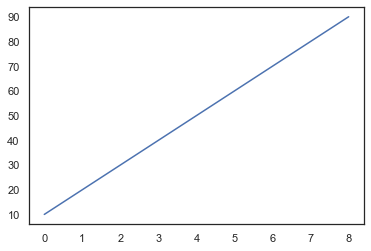

In [29]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(10, 100, 10)
print(y)
plt.plot(y)

You can also plot this data as a point graphic and only have to pass appropriate arguments here. In the example below, an `"o"` is passed as the format argument, which changes the representation of the data accordingly. In this format string you can change the symbols as well as the colors. In the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) there is an overview of all possible values.

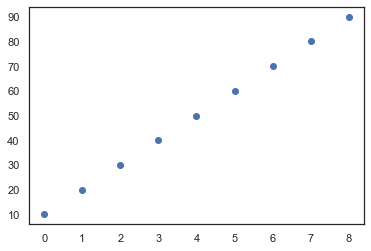

In [30]:
plt.plot(y, "o")

## Histograms
With the function `plt.hist` you can create histograms.

(array([  14.,   81.,  515., 1589., 2842., 2824., 1611.,  435.,   79.,
          10.]),
 array([ 41.58805293,  53.31580035,  65.04354777,  76.77129519,
         88.49904261, 100.22679003, 111.95453745, 123.68228487,
        135.41003229, 147.13777971, 158.86552713]),
 <BarContainer object of 10 artists>)

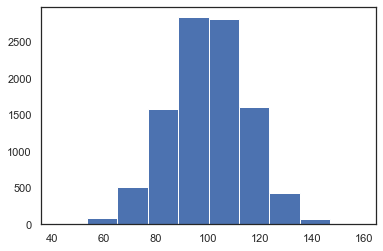

In [31]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
plt.hist(x)

Text(0.5, 1.0, 'Histogramm')

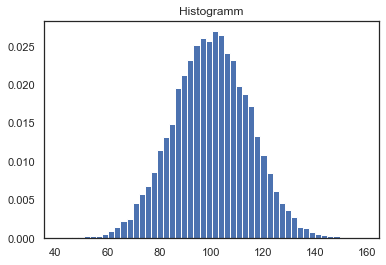

In [32]:
plt.hist(x, bins=50, density=True)
plt.title("Histogramm")

## Getting more comfortable with Matplotlib

In the previous plots the x-axis was created automatically - but you can also specify it explicitly and thus create a scatterplot. Create a plot using `matplotlib.pyplot.subplots`, `matplotlib.axes.Axes.scatter`, and some other methods on the `matplotlib.axes.Axes` object:

Text(0.5, 1.0, 'some title')

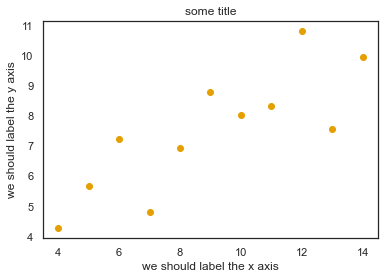

In [33]:
# this line tells Jupyter to display matplotlib figures in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

fig, ax = plt.subplots() # this creates the figure objects we are working with

ax.scatter(x=data_x, y=data_y, c="#E69F00") # #NNNNNN is the HEX color representation, you can create color themes here: https://color.adobe.com/de/create/color-wheel

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")


## Matplotlib has two different interfaces

The more traditional option uses the pyplot interface (`plt.<matplotlib.pyplot>` carries the global settings):

Text(0.5, 1.0, 'some title')

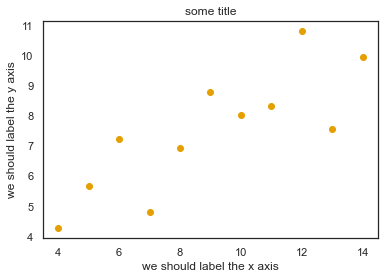

In [34]:
import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

plt.scatter(x=data_x, y=data_y, c="#E69F00")

plt.xlabel("we should label the x axis")
plt.ylabel("we should label the y axis")
plt.title("some title")

When searching for help on the internet, you will find both approaches, they can also be mixed. Although the pyplot interface looks more compact, **recommend to learn and use is the object oriented interface**.

## Subplots
Note that here one can plot directly with the axes method ax.plot and not as before with `plt.plot`.
If there are several plots in a figure, `plt.subplots` returns a list of axes. In these you can now create the desired plots:

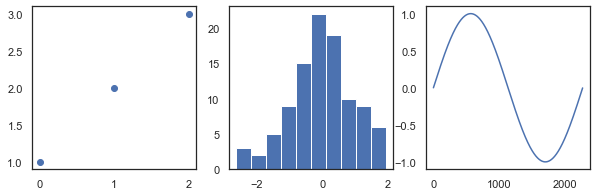

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))  # 1 row, 3 columns
axes[0].plot([1, 2, 3], "o")  # left
axes[1].hist(np.random.randn(100))  # middle
axes[2].plot(np.sin(np.arange(0, 2 * np.pi, 1/360)))  # right

## Styling and customizing plots

- **Do not customize "manually"** using a graphical program (not easily repeatable/reproducible).
- Matplotlib and also all the other libraries allow to customize almost every aspect of a plot.
- It is useful to study [Matplotlib parts of a figure](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure) so that we know what to search for to customize things.
- Matplotlib cheatsheets: <https://github.com/matplotlib/cheatsheets>
- You can also select among pre-defined themes/[style sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) with `matplotlib.style.use`, for instance:

In [36]:
plt.style.use('ggplot')

In [37]:
import numpy as np 

# We observe a bunch of squirrels with [height (cm), weight (grams)] pairs
data = np.array([[10., 600.], [16., 1200], [6., 800], [12., 700.], [17., 1400.],
                [8., 500.], [20., 1500.], [21., 1300.], [11., 800.], [18., 1100.]])

[Text(0.5, 0, 'Height (cm)'),
 Text(0, 0.5, 'Weight (g)'),
 (0.0, 25.0),
 (300.0, 1700.0)]

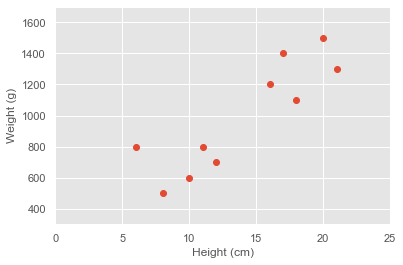

In [38]:
# Visualize our data!
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], '.', ms=12)
ax.set(xlabel='Height (cm)', ylabel='Weight (g)',
    xlim=[0, 25], ylim=[300, 1700])

[Text(0.5, 0, 'Height (cm)'),
 Text(0, 0.5, 'Weight (g)'),
 (0.0, 25.0),
 (300.0, 1700.0)]

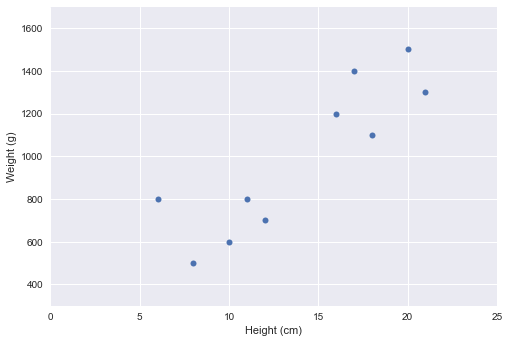

In [39]:
plt.style.use('seaborn')

# Visualize our data!
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], '.', ms=12)
ax.set(xlabel='Height (cm)', ylabel='Weight (g)',
    xlim=[0, 25], ylim=[300, 1700])


<div class="alert alert-info"> 
For all the different presets of styles in Matplotlib see: 
<a href=https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html class="alert-link">the gallery.</a>
</div>

## Exercises

First load data from the scikit package as a pandas dataframe. You can adress each column in a dataframe via `df["columnname"]`.

In [40]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [41]:
# get one feature
length_sep = df["sepal length (cm)"]


<div class="alert alert-danger">
Task 2.6: Make a scatterplot of sepal length against petal length and color each dot according to its species (numeric keys can be found in iris.target) (2 points). Add labels to the x and y axis (1 point).
<br>
</div>

<div class="alert alert-danger">
Task 2.7: This is a great exercise which is very close to real life. (3 points)

Your task is to select one visualization library (some need to be installed first - indoubt choose Matplotlib or Seaborn since they are part of Anaconda installation):
(i) <a href=https://matplotlib.org/stable/gallery/index.html class="alert-link">Matplotlib</a>: probably the most standard and most widely used
(ii) <a href=https://seaborn.pydata.org/examples/index.html class="alert-link">Seaborn</a>: probably the most standard and most widely used
(iii) <a href=https://yhat.github.io/ggpy/ class="alert-link">ggplot</a>: probably the most standard and most widely used

- Browse the various example galleries (links above).
- Select one example that simply interests you.
- First try to reproduce this example in the Jupyter notebook.
- Then try to print out the data that is used in this example just before the call of the plotting function to learn about its structure. Is it a pandas dataframe? Is it a NumPy array? Is it a dictionary? A list or a list of lists?
</div>
